![](https://d6vdma9166ldh.cloudfront.net/media/images/4594dcf8-a8c5-4fa7-a6d4-bab2c9081041.jpg)

# Zadanie:
### Przeanalizuj dane historyczne dotyczące sprzedaży produktu i zamodeluj profil klienta



---



#### Dane w pliku `train.xlsx` zawierają następujące dane:

|Zmienna|Objasnienie|
|-------|-----------|
|Id|Unique Id|
|Bought_Product|Whether customer bought new product or not|
|Market_Segment	|One of 3 market segments|
|Online_Account	|Whether customer have online account|
|EnergyTariff| One of 3 Energy Tariffs|
|Sex| F-female, M-male|
|Age| Age in years|
|Non_Energy_Product| How many non-energy products customer have e.g. insurance|
|How_many_other_contracts| How many other energy contracts customer have (e.g. for 2nd property)|
|Billing_Amount| Average Monthly Invoice in PLN|
|District| One of A-E Districts|



## 1. Wczytanie pakietów

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Wczytanie plików

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# >>>>>>>TU ZMIENIĆ ŚCIEŻKĘ DO PLIKU <<<<<<<#
dataset_path = "/content/drive/My Drive/DSMaciek/train.xlsx"
raw_df = pd.read_excel(dataset_path)
raw_df.set_index('Id', inplace=True)
# raw_df.sample()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
392,1,1,1.0,C12,F,16,0,1,57.9792,DistrictC


### Sprawdzenie poprawności danych

In [0]:
# for col_ in raw_df.columns:
#   print(f">>>>>{col_}<<<<<")
#   unique_values = raw_df[col_].value_counts()
#   if unique_values.shape[0] < 10:
#     print(unique_values)
#   else:
#     raw_df[col_].hist(figsize=(5,2))
#     plt.title(col_)
#     plt.show()
    

In [63]:
df = raw_df.drop("Online_Account", axis=1)
# df = raw_df.drop(columns=['Online_Account'])
df.loc[(df['Age'] < 18) | (df['Age'] > 100), 'Age'] = np.nan
df.dropna(inplace=True)
print("liczba obserwacji i zmiennych przed i po obróbce")
print(raw_df.shape, df.shape)
cat_columns = ['Market_Segment', 'Sex', 'District', 'EnergyTariff']
for col_ in cat_columns:
  df = df.join(pd.get_dummies(df[col_], drop_first=True, prefix=col_)).drop(col_, axis=1)

df.sample()

liczba obserwacji i zmiennych przed i po obróbce
(626, 10) (494, 9)


,Bought_Product,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,Market_Segment_2,Market_Segment_3,Sex_M,District_DistrictB,District_DistrictC,District_DistrictD,District_DistrictE,EnergyTariff_G11,EnergyTariff_G12
Id,,,,,,,,,,,,,,
710,0,49.0,1,1,110.8833,0,0,1,0,0,1,0,0,0


## 3. Modelowanie

In [0]:
## import pakietów
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix


In [0]:
y = df["Bought_Product"]
X = df.drop('Bought_Product', axis=1)
df.shape, y.shape, X.shape

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_train.shape, y_test.shape

((296, 13), (198,))

In [0]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)


0.8617021276595744
0.7857142857142857
(183, 5, 27, 81)


Text(0.5, 1.0, 'receiver operating characteristic curve')

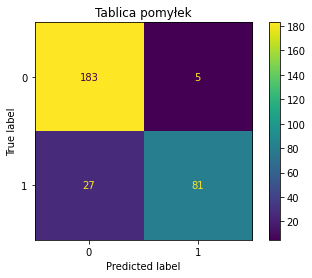

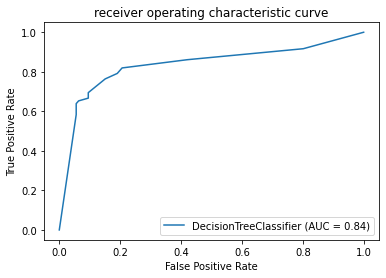

In [110]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"{balanced_accuracy_score(y_train, y_train_pred)}")
print(f"{balanced_accuracy_score(y_test, y_test_pred)}")

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print((tn, fp, fn, tp))
plot_confusion_matrix(model, X_train, y_train, values_format='.3g')
plt.title('Tablica pomyłek')
# threshold = 0.40
# predictions = [1 if row[1] >= threshold else 0 for row in model.predict_proba(X_train)]
# np.array_equal(predictions, y_train_pred)

plot_roc_curve(model, X_test, y_test)
plt.title('Receiver Operating Characteristic')

In [0]:
# export_graphviz(model, out_file='tree.dot', feature_names = X_train.columns,
#                 rounded = True, proportion = False, precision = 2, filled = True)
# !dot -Tpng tree.dot -o tree.png -Gdpi=600

# from IPython.display import Image
# Image(filename = 'tree.png')

In [0]:
# for k, importance in zip(X.columns, model.feature_importances_):
#   print(k, importance)

In [0]:
# model2 = LinearSVC(random_state=0, max_iter=10000)
# model2.fit(X_train, y_train)
# y_train_pred = model2.predict(X_train)
# y_test_pred = model2.predict(X_test)
# print(f"{accuracy_score(y_train, y_train_pred)}")
# print(f"{accuracy_score(y_test, y_test_pred)}")